# Energy A.I. Hackathon 2024 Workflow - Banana Ducks 

#### Authors: Christopher Aaron Lawson [CS], Jonathan Michael Morris [PGE], Arshan Saniei-Sani [ASE], McTzviel Alejandro Oyarinde Quinetro [ASE] 

#### The University of Texas at Austin, Austin, Texas USA 
___

### Executive Summary 

We were tasked with determining what the average Pump difference there was from a well given considerable information about it. This includes the location of the well, locations and information of surrounding wells either in the same layer or in a different layer. And information regarding those that are in or out of zone to it. 

___

### Workflow Goal

Create a mathematical model to predict the average pump difference from the information given.
___

### Workflow Steps 

Enumerated steps, very short and concise overview of your methods and workflow

1. **Data Analysis** - basic data checking and visualization
2. **Feature Selection** - mutual information-based approach with minimum redundancy, maximum relevance score
3. **Machine Learning Model \#1** - Predict feature $X$ from $Y,Z$



### Import Packages

In [9]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno
import random

import seaborn as sns

Here we will be taking in the data that we are interested in. Here, we are given two types of variables, categorical and numerical. So we did some preprocessing to separate the numerical data from the categorical data. The following is an analysis of the data.

## Numerical Data

In [3]:
num_data = pd.read_csv("Numerical_HackathonData2024.csv")
num_data.head()

,Well ID,Avg Pump Difference,Lateral Length,TVD,PARENT_CODEV_1050_WELL_COUNT,PARENT_IN_ZONE_MIN_HYPOT,PARENT_OUT_ZONE_MIN_HYPOT,PARENT_IN_ZONE_MIN_MAP_DIST,PARENT_OUT_ZONE_MIN_MAP_DIST,PARENT_1050_AVG_WELL_AGE,...,CODEV_3000_AVG_TVD_DIST,CODEV_3000_AVG_WELL_AGE,CODEV_3000_MEDIAN_WELL_AGE,CODEV_3000_WELL_COUNT,Pressure Gradient (psi/ft) new,Soak Time,Avg Open Pressure,SD Open Pressure,Avg Close Pressure,SD Close Pressure
0,1,-0.93,10300,10415.0,2,NaN,980.0,NaN,50.0,1764.0,...,4,0.0,0.0,1,0.593758,34,3304.124833,261.7,2719.898438,472.4
1,2,-8.45,10300,10415.0,2,NaN,980.0,NaN,50.0,1764.0,...,4,0.0,0.0,1,0.597059,67,3301.199254,255.9,2934.885325,747.4
2,3,8.70,11000,8470.0,6,NaN,1865.0,NaN,1838.0,NaN,...,682,4.5,0.0,11,0.516873,34,2774.407080,184.8,1589.948673,596.9
3,5,19.93,2300,9295.0,4,1832.0,540.0,1823.0,356.0,4726.0,...,277,1.0,1.0,2,0.503327,336,NaN,NaN,NaN,NaN
4,6,-4.34,12300,10355.0,0,2763.0,1232.0,2763.0,1.0,NaN,...,1410,21.5,28.5,4,0.565200,21,2963.567911,232.0,2063.408619,517.8


First to view the percentage of missing nulls.

<AxesSubplot:>

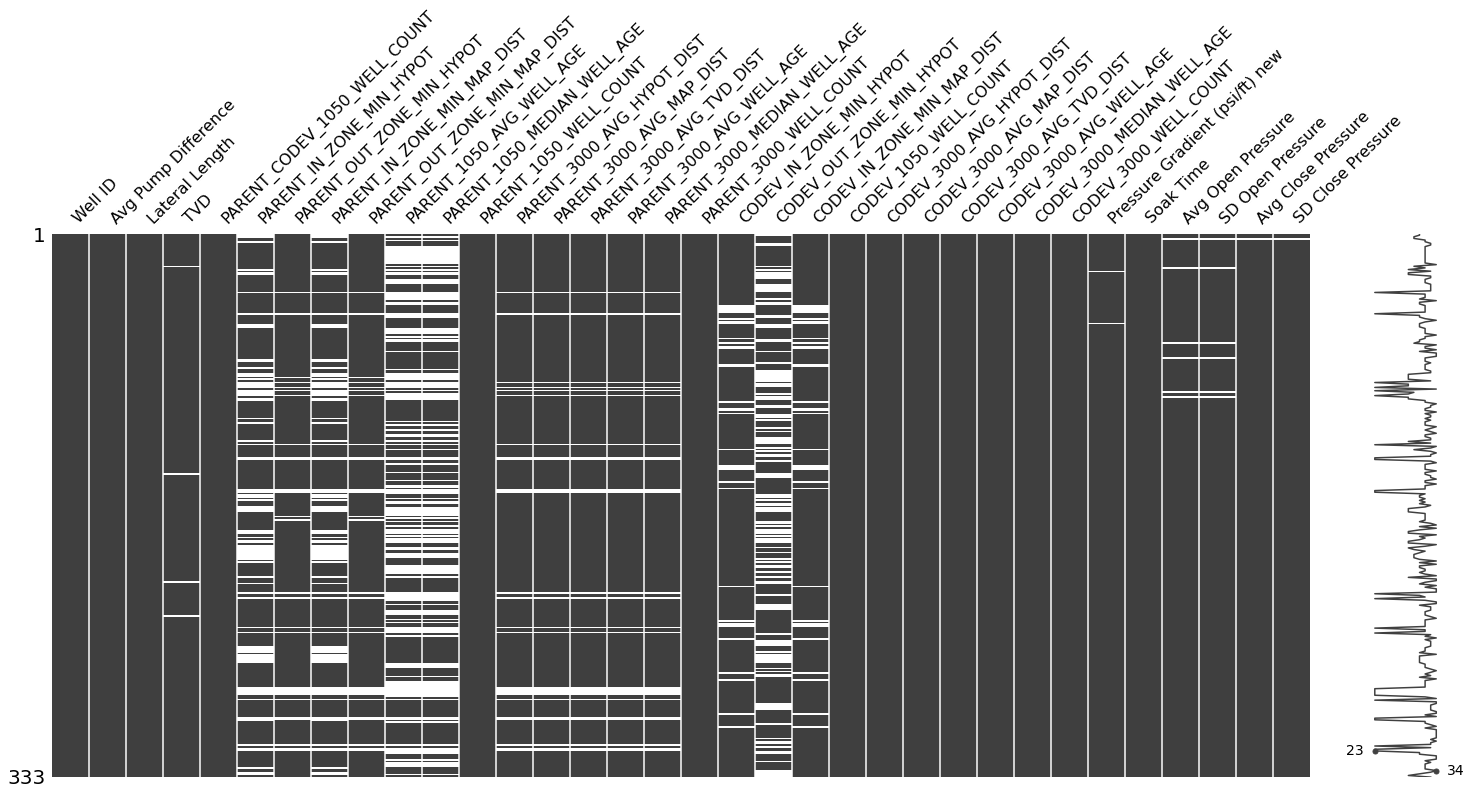

In [4]:
msno.matrix(num_data)

In [5]:
num_missing = pd.DataFrame(columns=["Feature", "% Complete"])

nans_1 = num_data.isnull().sum(axis = 0).tolist()
for feature in range(0, len(num_data.columns)):
    num_missing.loc[feature, "Feature"] = num_data.columns[feature]
    num_missing.loc[feature, "% Complete"] = (1-nans_1[feature] / len(num_data.index))*100

num_missing

,Feature,% Complete
0,Well ID,100
1,Avg Pump Difference,100
2,Lateral Length,100
3,TVD,98.7988
4,PARENT_CODEV_1050_WELL_COUNT,100
5,PARENT_IN_ZONE_MIN_HYPOT,73.8739
6,PARENT_OUT_ZONE_MIN_HYPOT,91.2913
7,PARENT_IN_ZONE_MIN_MAP_DIST,73.8739
8,PARENT_OUT_ZONE_MIN_MAP_DIST,91.2913
9,PARENT_1050_AVG_WELL_AGE,56.7568


Here we see that mostly everything is filled out but we do have some features that are very empty.

In [7]:
num_missing[num_missing["% Complete"] <= 85]

,Feature,% Complete
5,PARENT_IN_ZONE_MIN_HYPOT,73.8739
7,PARENT_IN_ZONE_MIN_MAP_DIST,73.8739
9,PARENT_1050_AVG_WELL_AGE,56.7568
10,PARENT_1050_MEDIAN_WELL_AGE,56.7568
19,CODEV_OUT_ZONE_MIN_HYPOT,63.6637


Next we want to take a look at correlations between the data. Because dropping the data would drop more than 50% of the data, we just initially imputed nans with the mean of the feature. The resulting correlation matrix is as follows:

In [15]:
def plot_corr(dataframe,size=10):                         # plots a graphical correlation matrix 
    corr = dataframe.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    im = ax.matshow(corr,vmin = -1.0, vmax = 1.0)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha='left');
    plt.yticks(range(len(corr.columns)), corr.columns);
    plt.colorbar(im, orientation = 'vertical')
    plt.title('Correlation Matrix')

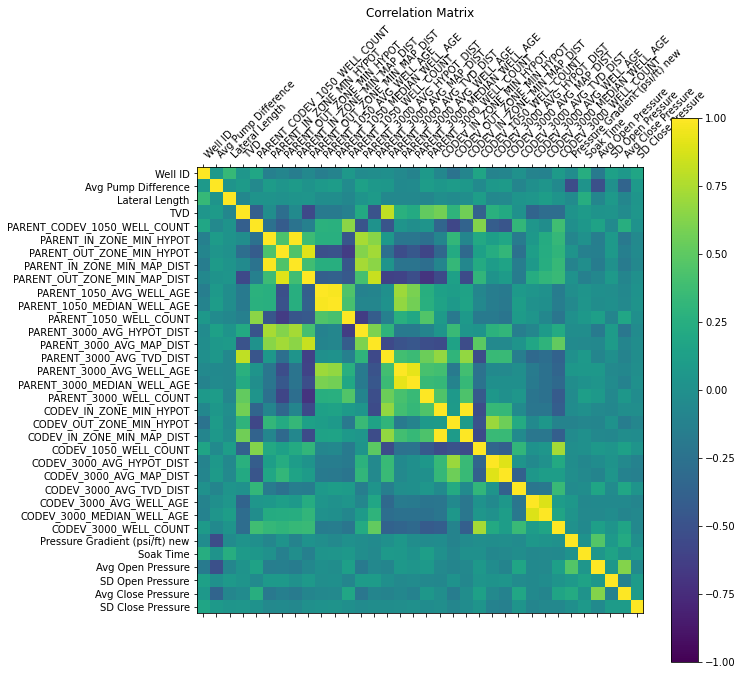

In [16]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')  # or another appropriate strategy
my_data_imputed = pd.DataFrame(imputer.fit_transform(num_data), columns=num_data.columns)

corr_matrix = np.corrcoef(my_data_imputed, rowvar = False)
# print(np.around(corr_matrix,2))                           # print the correlation matrix to 2 decimals
plot_corr(num_data,10)                                      # using our correlation matrix visualization function
plt.show()

Next we wanted to take a look at the distribution of the different features. We did so through plotting some histograms

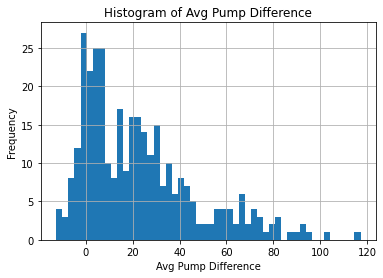

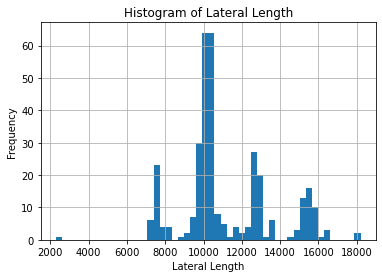

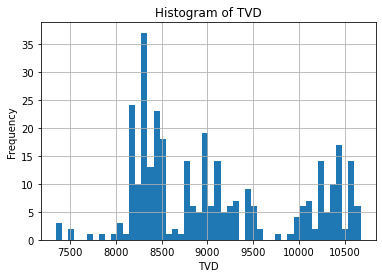

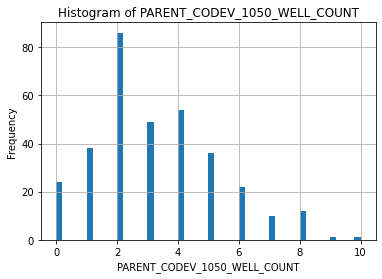

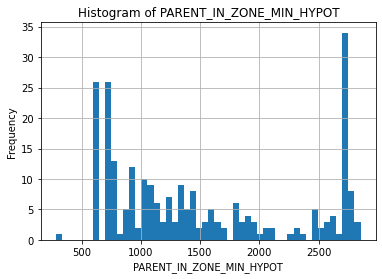

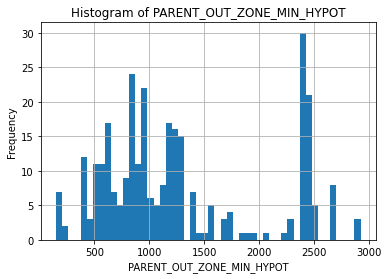

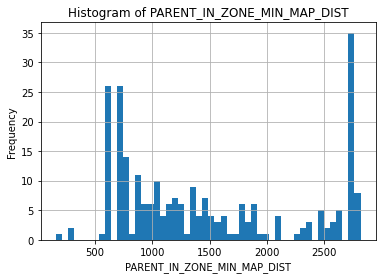

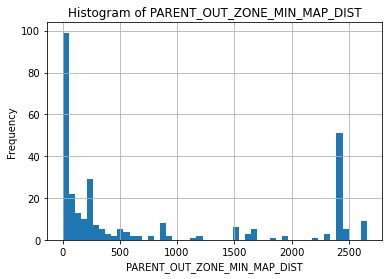

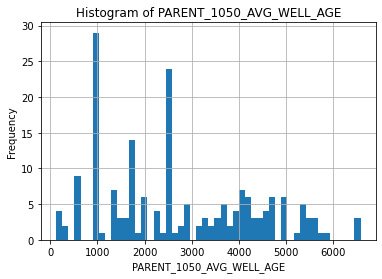

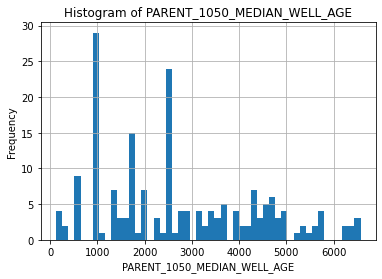

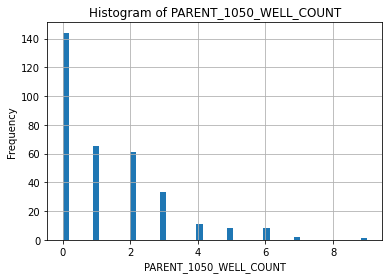

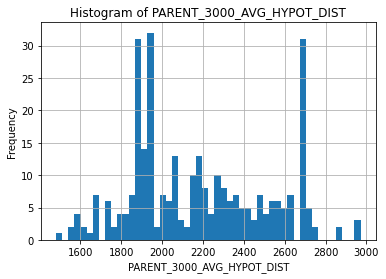

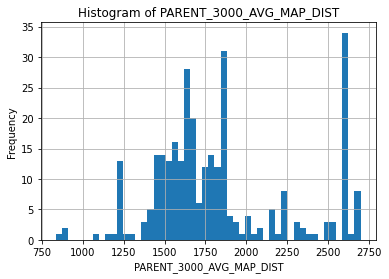

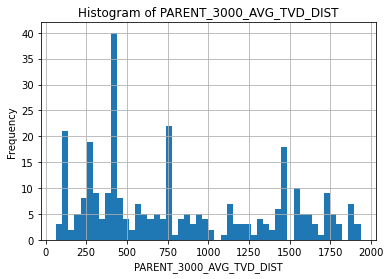

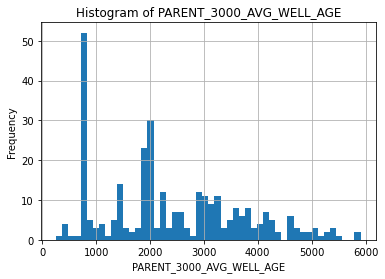

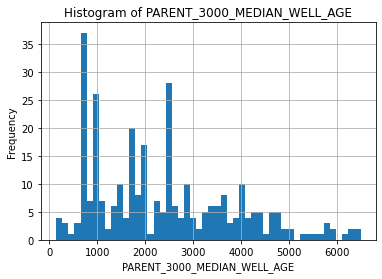

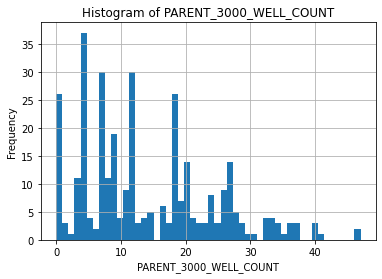

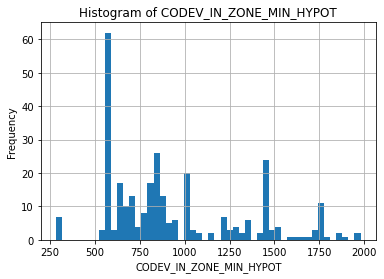

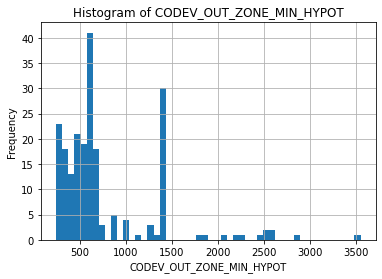

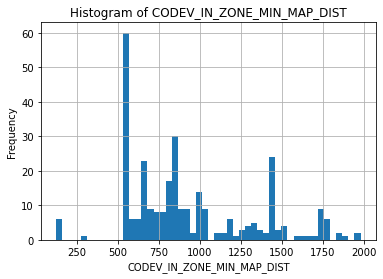

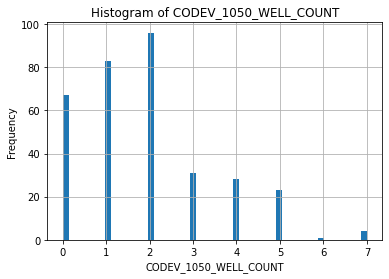

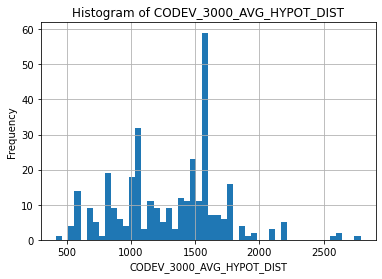

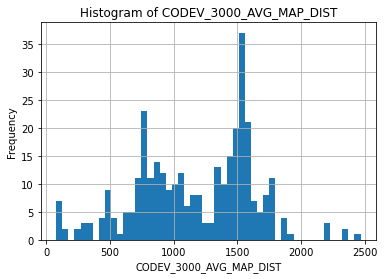

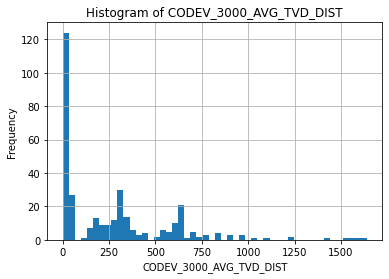

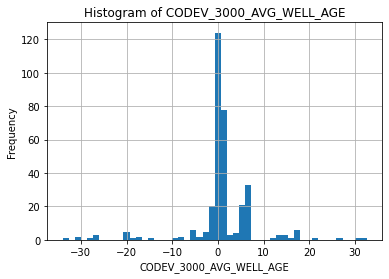

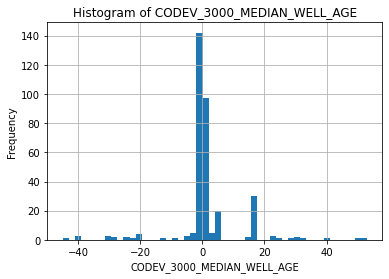

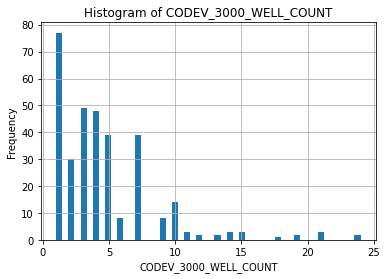

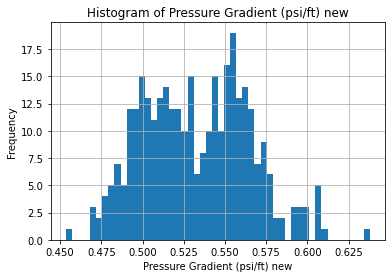

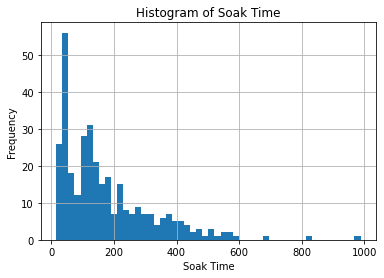

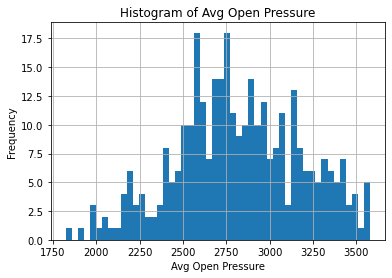

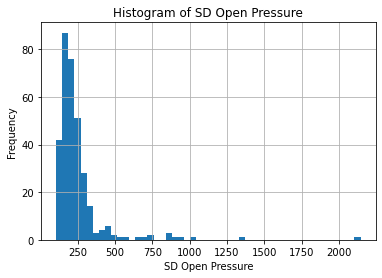

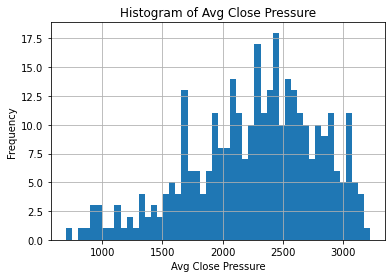

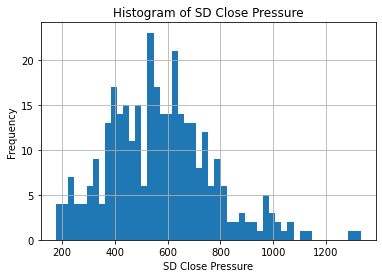

In [22]:
def plot_histograms(dataframe, bins=5):
    """
    Plots histograms for each column in the given dataframe.
    
    Args:
    dataframe (pd.DataFrame): The dataframe containing the data.
    bins (int): Number of bins for the histograms. Default is 5.
    """
    for column in dataframe.columns:
        plt.figure()
        dataframe[column].hist(bins=bins)
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

# Call the function with your data
plot_histograms(num_data.drop(["Well ID"], axis = 1), bins=50)  # Change 'bins' to adjust the number of bins

## Categorical Data

Now we do the same for the categorical data

In [23]:
cat_data = pd.read_csv("Categorical_HackathonData2024.csv")
cat_data.head()

,Well ID,Avg Pump Difference,Area,Fluid System,Development Strategy,DELAYED,BOUND_CODE,CODEV_POSITION,CODEV_FORMATION_POSITION
0,1,-0.93,Acadia,Campbell,Coke,1,11100000,Edge,Edge
1,2,-8.45,Acadia,Campbell,Coke,1,11100000,Edge,Edge
2,3,8.70,Arches,Campbell,Orange Crush,0,101111,Middle,Edge
3,5,19.93,Badlands,Campbell,Mountain Dew,1,10001101,Edge,Edge
4,6,-4.34,Big Bend,Campbell,Coke,1,11110000,Edge,Edge


<AxesSubplot:>

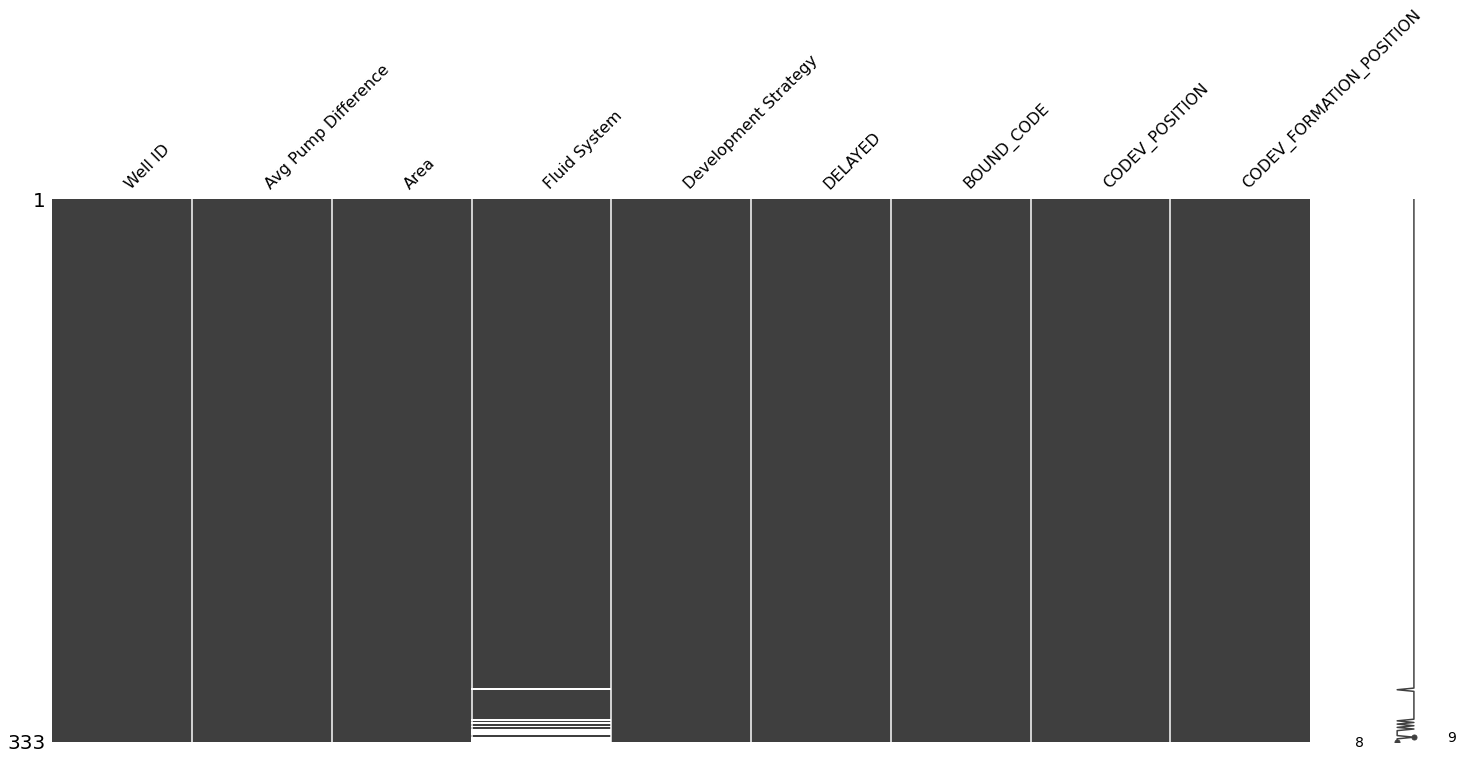

In [24]:
msno.matrix(cat_data)

In [25]:
num_missing = pd.DataFrame(columns=["Feature", "% Complete"])

nans_1 = cat_data.isnull().sum(axis = 0).tolist()
for feature in range(0, len(cat_data.columns)):
    num_missing.loc[feature, "Feature"] = cat_data.columns[feature]
    num_missing.loc[feature, "% Complete"] = (1-nans_1[feature] / len(cat_data.index))*100

num_missing

,Feature,% Complete
0,Well ID,100
1,Avg Pump Difference,100
2,Area,100
3,Fluid System,96.6967
4,Development Strategy,100
5,DELAYED,100
6,BOUND_CODE,100
7,CODEV_POSITION,100
8,CODEV_FORMATION_POSITION,100


Here we just have one feature that is missing values but we're just going to drop this respective data.

Now instead of histograms, we were interested in the frequency counts for these categorical variables to get a distribution of the values.

In [26]:
# Calculate the percentage of NaN values for each column
nan_percentage = cat_data.isna().mean() * 100

# For categorical data, calculate the frequency of each category
categorical_columns = cat_data.select_dtypes(include=['object', 'category']).columns
categorical_summary = {}

# Indent size: change this value to adjust the indentation
indent_size = 6

# Iterate over categorical columns and calculate the overall count, NaN% and frequency data
for col in categorical_columns:
    count = cat_data[col].notna().sum()  # Count of non-NaN entries
    nan_pct = nan_percentage[col]       # NaN percentage
    freq_series = cat_data[col].value_counts().reset_index()  # Frequency counts for non-NaN values
    freq_series.columns = ['Value', 'Frequency']
    # Apply consistent indentation to the frequency data
    freq_series['Value'] = freq_series['Value'].apply(lambda x: f"{' ':<{indent_size}}{x}")
    categorical_summary[col] = {
        'count': count,
        'NaN%': nan_pct,
        'frequency': freq_series
    }

# Display the summary for each categorical column
for col, summary in categorical_summary.items():
    print(f"\nSummary for {col}:")
    print(f"Count: {summary['count']}")
    print(f"NaN%: {summary['NaN%']:.2f}%")
    print("Frequency:")
    print(summary['frequency'].to_string(index=False))


Summary for Area:
Count: 333
NaN%: 0.00%
Frequency:
                       Value  Frequency
                 Great Basin         33
                  Everglades         25
            Petrified Forest         24
                 Canyonlands         21
                     Glacier         17
                  Lake Clark         17
                    Big Bend         16
                Kings Canyon         16
               Mount Rainier         16
                      Acadia         12
                 Grand Teton         12
            Carlsbad Caverns         11
                 Hot Springs         11
       Great Smoky Mountains         10
         Guadalupe Mountains         10
                      Denali         10
                    Badlands          9
                Grand Canyon          9
              North Cascades          8
                     Sequoia          8
                      Arches          7
                 Joshua Tree          6
            Great Sand Dune

So here we have most features be pretty evently distributed. but there are a couple that aren't as distributed that we will just have to be careful with.

We then send all of this information into a csv to then eventually train.

## Feature Selection

 Here one of our features that we ended up using was `PARENT_IN_ZONE_MIN_HYPOT` that had quite a few missing values, so we wnated to impute the value by training what we did have to figure out that value.

In [ ]:
# Function to calculate MAPE
def calculate_mape(y_true, y_pred):
    ape = 100 * np.abs((y_true - y_pred) / y_true)
    return np.mean(ape)

# Load your data
data_dir = 'Train_HackathonData2024.csv'
data = pd.read_csv(data_dir)

# Define the target and feature variables
target = 'SD Open Pressure'
feature_1 = 'Area'  # Categorical
feature_2 = 'Development Strategy'  # Categorical
feature_3 = 'PARENT_CODEV_1050_WELL_COUNT'  # Numerical
feature_4 = 'PARENT_3000_AVG_HYPOT_DIST'  # Numerical

# Keep only the relevant features and target
data = data[[target, feature_1, feature_2, feature_3, feature_4]]
data = data.dropna(subset=[target])

# Preprocessing
categorical_features = [feature_1, feature_2]
numerical_features = [feature_3, feature_4]

numerical_transformer = SimpleImputer(strategy='median')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define target and features
X = data.drop(target, axis=1)
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameters for each model
param_grid = {
    'Random Forest': {'model__n_estimators': [10, 50, 100], 'model__max_depth': [None, 10, 20, 30]},
    'XGBoost': {'model__n_estimators': [50, 100, 200], 'model__learning_rate': [0.01, 0.1, 0.2]},
    'SVR': {'model__C': [0.1, 1, 10], 'model__gamma': ['scale', 'auto']},
    'KNN': {'model__n_neighbors': [3, 5, 7]},
    'MLP': {'model__hidden_layer_sizes': [(50,), (100,), (50, 50)], 'model__alpha': [0.0001, 0.001, 0.01]}
}

# Models to train
models = [
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('XGBoost', XGBRegressor(random_state=42)),
    ('SVR', SVR()),
    ('KNN', KNeighborsRegressor()),
    ('MLP', MLPRegressor(random_state=42))
]

# K-Fold cross-validation setup
kf = KFold(n_splits=5, shuffle=True, random_state=1)

# Dictionary to store the average MAPE for each model
average_mape_scores = {}

# Iterate over models
for model_name, model in models:
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])
    grid_search = GridSearchCV(pipeline, param_grid[model_name], cv=kf, scoring='neg_mean_absolute_error')
    grid_search.fit(X_train, y_train)

    # Best model
    best_model = grid_search.best_estimator_

    # Predict and calculate MAPE
    predictions = best_model.predict(X_test)
    mape = calculate_mape(y_test, predictions)
    average_mape_scores[model_name] = mape

# Plotting the average MAPE for each model
plt.figure(figsize=(12, 6))
plt.bar(average_mape_scores.keys(), average_mape_scores.values(), color='skyblue')
plt.xlabel('Model')
plt.ylabel('Average RMSE (%)')
plt.title('Comparison of Average RMSE Across Models with Hyperparameter Tuning')
plt.xticks(rotation=45)
plt.show()

# Retrain the XGBoost model on the entire dataset (excluding missing target values)
xgboost_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('model', XGBRegressor(random_state=42))])
grid_search_xgb = GridSearchCV(xgboost_pipeline, param_grid['XGBoost'], cv=kf, scoring='root_mean_squared_error')
grid_search_xgb.fit(X_train, y_train)

# Load the original dataset to predict and fill in missing target values
full_data = pd.read_csv('Original_HackathonData2024.csv')

# Identify the rows where the target is missing
missing_target_indices = full_data[full_data[target].isna()].index

# Predict the missing target values
if not missing_target_indices.empty:
    X_missing = full_data.loc[missing_target_indices, [feature_1, feature_2, feature_3, feature_4]]
    predicted_values = grid_search_xgb.best_estimator_.predict(X_missing)
    full_data.loc[missing_target_indices, target] = predicted_values

We then did further cleaning on the data to get our categorical varialbes and everything else correctly cleaned.

In [27]:
raw_df = pd.read_csv("Cleaned_HackathonData2024.csv")
raw_df

,Well ID,Avg Pump Difference,Area,Lateral Length,Fluid System,TVD,Development Strategy,DELAYED,BOUND_CODE,PARENT_CODEV_1050_WELL_COUNT,...,CODEV_3000_AVG_TVD_DIST,CODEV_3000_AVG_WELL_AGE,CODEV_3000_MEDIAN_WELL_AGE,CODEV_3000_WELL_COUNT,Pressure Gradient (psi/ft) new,Soak Time,Avg Open Pressure,SD Open Pressure,Avg Close Pressure,SD Close Pressure
0,1,-0.93,Acadia,10300,Campbell,10415.0,Coke,1,11100000,2,...,4,0.0,0.0,1,0.593758,34,3304.124833,261.7,2719.898438,472.4
1,2,-8.45,Acadia,10300,Campbell,10415.0,Coke,1,11100000,2,...,4,0.0,0.0,1,0.597059,67,3301.199254,255.9,2934.885325,747.4
2,3,8.70,Arches,11000,Campbell,8470.0,Orange Crush,0,101111,6,...,682,4.5,0.0,11,0.516873,34,2774.407080,184.8,1589.948673,596.9
3,4,NaN,Arches,11000,Campbell,10555.0,Coke,1,11110000,1,...,4,0.0,0.0,1,0.501287,30,2653.539415,206.7,1304.162878,551.5
4,6,-4.34,Big Bend,12300,Campbell,10355.0,Coke,1,11110000,0,...,1410,21.5,28.5,4,0.565200,21,2963.567911,232.0,2063.408619,517.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,349,4.09,Grand Canyon,10300,Williams,8350.0,Orange Crush,0,11001000,3,...,313,0.7,1.0,3,0.568531,108,2928.200185,238.2,2381.445271,525.2
340,350,37.96,Grand Canyon,10300,Williams,8350.0,Orange Crush,0,11001000,3,...,313,0.7,1.0,3,0.554243,114,2747.262178,217.9,2309.826087,653.4
341,353,68.21,Mount Rainier,7700,Williams,10365.0,Coke,1,11111000,4,...,10,0.0,0.0,1,0.512640,245,3056.211966,212.0,2032.922355,533.8
342,354,29.18,Mount Rainier,7700,Williams,10300.0,Coke,1,11111000,3,...,12,0.0,0.0,1,0.530874,315,2969.985594,230.1,1821.549742,314.5


First was with the expansion of the bound code. Here we wanted to condense this into a numeric variable than the current string representation.

In [ ]:
def createBound(row, idx):
    bound = row["BOUND_CODE"]
    bound = "%08d" % bound
    
    side_index = [0, 4]
    above_index = [1, 2, 3]
    below_index = [5, 6, 7]
    side = sum([int(bound[i]) for i in side_index])
    above = sum([int(bound[i]) for i in above_index])
    below = sum([int(bound[i]) for i in below_index])
    
    if idx == 0:
        return side
    elif idx == 1:
        return above
    else:
        return below
    
    
raw_df["side"] = raw_df.apply(lambda x: createBound(x, 0), axis=1)
raw_df["above"] = raw_df.apply(lambda x: createBound(x, 1), axis=1)
raw_df["below"] = raw_df.apply(lambda x: createBound(x, 2), axis=1)

In [ ]:
raw_df = raw_df.drop(["BOUND_CODE"], axis = 1)

Next we one hot encoded our remaining categorical variables

In [ ]:
cat_vars = [
    "Area",
    "Fluid System",
    "Development Strategy"
]

for col in cat_vars:
    temp = pd.get_dummies(raw_df[col], prefix=col)
    raw_df[temp.columns] = temp[temp.columns]
    raw_df = raw_df.drop([col], axis = 1)

In [ ]:
raw_df

By this point we have our final working dataset to then send into model training.

## Model Building

In [48]:
import pandas as pd
import numpy as np
import warnings; warnings.simplefilter('ignore')

import time

In [49]:
# Put in the path to the data here
path_to_data = "Final_dataset.csv"

raw_df = pd.read_csv(path_to_data).drop(raw_df.columns[0], axis = 1)
raw_df.head()

,Well ID,Avg Pump Difference,Lateral Length,TVD,DELAYED,PARENT_CODEV_1050_WELL_COUNT,PARENT_IN_ZONE_MIN_HYPOT,PARENT_1050_WELL_COUNT,PARENT_3000_AVG_HYPOT_DIST,PARENT_3000_WELL_COUNT,...,Fluid System_Campbell,Fluid System_Williams,Fluid System_Young,Development Strategy_Coke,Development Strategy_Dr Pepper,Development Strategy_Mountain Dew,Development Strategy_Orange Crush,Development Strategy_Pepsi,Development Strategy_Pibb Extra,Development Strategy_Sprite
0,1,-0.93,10300,10415.0,1,2,1195.286743,2,2071.0,12,...,1,0,0,1,0,0,0,0,0,0
1,2,-8.45,10300,10415.0,1,2,1195.286743,2,2071.0,12,...,1,0,0,1,0,0,0,0,0,0
2,3,8.70,11000,8470.0,0,6,2882.384033,0,2492.0,6,...,1,0,0,0,0,0,1,0,0,0
3,4,NaN,11000,10555.0,1,1,1059.568848,0,2378.0,20,...,1,0,0,1,0,0,0,0,0,0
4,6,-4.34,12300,10355.0,1,0,2763.000000,0,2464.0,13,...,1,0,0,1,0,0,0,0,0,0


Because this contains both testing and training data we will separate it

In [50]:
test_df = raw_df[raw_df["Avg Pump Difference"].isna()].reset_index(drop = True)
train_df = raw_df[~raw_df["Avg Pump Difference"].isna()].reset_index(drop = True)

The following were the models we ended up using

In [51]:
# Linear Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, BayesianRidge, SGDRegressor

# Kernel Ridge
from sklearn.kernel_ridge import KernelRidge

# SVM
from sklearn.svm import SVR

# Nearest Neighbors
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor

# Bayes
from sklearn.naive_bayes import GaussianNB

# Decision Tree
from sklearn.tree import DecisionTreeRegressor

# Ensemble
from sklearn.ensemble import RandomForestRegressor

from xgboost import XGBRegressor


In [60]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [57]:
all_cols = train_df.columns.tolist()

y = "Avg Pump Difference"

all_cols.remove(y)
x = all_cols

X_train = train_df[x]
Y_train = train_df[[y]]

In [61]:
def training_loop(model, X, Y, num_folds):
    kf = KFold(n_splits=num_folds, shuffle = True)
    
    total = []
    for i, (train_index, test_index) in enumerate(kf.split(X)):
        train_X = X[train_index,:]
        train_Y = Y.iloc[train_index,:]
        
        test_X = X[test_index,:]
        test_Y = Y.iloc[test_index,:]
        
        model.fit(train_X, train_Y)
        
        pred_Y = model.predict(test_X)
        
        cur_accuracy = mean_squared_error(test_Y, pred_Y)
        total.append(np.sqrt(cur_accuracy))
        
    return sum(total)/len(total)

In [62]:
models = [
    ("Linear", LinearRegression()),
    ("Ridge - 1", Ridge(solver="svd")),
    ("Ridge - 2 ", Ridge(solver="lsqr")),
    ("Ridge - 3", Ridge(alpha=1.5, solver="svd")),
    ("Ridge - 4", Ridge(alpha=1.5, solver="lsqr")),
    ("Ridge - 5", Ridge(alpha=2, solver="svd")),
    ("Ridge - 6", Ridge(alpha=2, solver="lsqr")),
    ("Ridge - 7", Ridge(alpha=2.5, solver="svd")),
    ("Ridge - 8", Ridge(alpha=2.5, solver="lsqr")),
    ("Lasso - 1", Lasso(warm_start=True)),
    ("Lasso - 2", Lasso(warm_start=False)),
    ("Lasso - 3", Lasso(alpha=1.5, warm_start=True)),
    ("Lasso - 4", Lasso(alpha=1.5, warm_start=False)),
    ("Lasso - 5", Lasso(alpha=2, warm_start=True)),
    ("Lasso - 6", Lasso(alpha=2, warm_start=False)),
    ("BayesianRidge", BayesianRidge()),
    ("Kernel Ridge", KernelRidge()),
    ("SVR - 1", SVR(degree=3)),
    ("SVR - 2", SVR(degree=4)),
    ("SVR - 3", SVR(degree=5)),
    ("SVR - 4", SVR(degree=10)),
    ("SVR - 5", SVR(degree=15)),
    ("SVR - 6", SVR(kernel="poly",degree=3)),
    ("SVR - 7", SVR(kernel="poly",degree=4)),
    ("SVR - 8", SVR(kernel="poly",degree=5)),
    ("SVR - 9", SVR(kernel="poly",degree=10)),
    ("SVR - 10", SVR(kernel="poly",degree=15)),
    ("SVR - 11", SVR(kernel="sigmoid",degree=3)),
    ("SVR - 12", SVR(kernel="sigmoid",degree=4)),
    ("SVR - 13", SVR(kernel="sigmoid",degree=5)),
    ("SVR - 14", SVR(kernel="sigmoid",degree=10)),
    ("SVR - 15", SVR(kernel="sigmoid",degree=15)),
    ("KNN - 1", KNeighborsRegressor(n_neighbors=5)),
    ("KNN - 2", KNeighborsRegressor(n_neighbors=10)),
    ("KNN - 3", KNeighborsRegressor(n_neighbors=15)),
    ("KNN - 4", KNeighborsRegressor(n_neighbors=20)),
    ("KNN - 5", KNeighborsRegressor(n_neighbors=25)),
    ("KNN - 6", KNeighborsRegressor(n_neighbors=30)),
    ("KNN - 7", KNeighborsRegressor(n_neighbors=35)),
    ("DT - 1", DecisionTreeRegressor(max_depth = None)),
    ("DT - 2", DecisionTreeRegressor(max_depth = 5)),
    ("DT - 3", DecisionTreeRegressor(max_depth = 10)),
    ("DT - 4", DecisionTreeRegressor(max_depth = 15)),
    ("DT - 5", DecisionTreeRegressor(max_depth = 20)),
    ("DT - 6", DecisionTreeRegressor(max_depth = 25)),
    ("DT - 7", DecisionTreeRegressor(max_depth = 30)),
    ("RF - 1", RandomForestRegressor(max_depth = None)),
    ("RF - 2", RandomForestRegressor(max_depth = 5)),
    ("RF - 3", RandomForestRegressor(max_depth = 10)),
    ("RF - 4", RandomForestRegressor(max_depth = 15)),
    ("RF - 5", RandomForestRegressor(max_depth = 20)),
    ("RF - 6", RandomForestRegressor(max_depth = 25)),
    ("RF - 7", RandomForestRegressor(max_depth = 30)),
    ("A - RF - 1", RandomForestRegressor(n_estimators=150, max_depth = None)),
    ("A - RF - 2", RandomForestRegressor(n_estimators=150, max_depth = 5)),
    ("A - RF - 3", RandomForestRegressor(n_estimators=150, max_depth = 10)),
    ("A - RF - 4", RandomForestRegressor(n_estimators=150, max_depth = 15)),
    ("A - RF - 5", RandomForestRegressor(n_estimators=150, max_depth = 20)),
    ("A - RF - 6", RandomForestRegressor(n_estimators=150, max_depth = 25)),
    ("A - RF - 7", RandomForestRegressor(n_estimators=150, max_depth = 30)),
    ("B - RF - 1", RandomForestRegressor(n_estimators=50, max_depth = None)),
    ("B - RF - 2", RandomForestRegressor(n_estimators=50, max_depth = 5)),
    ("B - RF - 3", RandomForestRegressor(n_estimators=50, max_depth = 10)),
    ("B - RF - 4", RandomForestRegressor(n_estimators=50, max_depth = 15)),
    ("B - RF - 5", RandomForestRegressor(n_estimators=50, max_depth = 20)),
    ("B - RF - 6", RandomForestRegressor(n_estimators=50, max_depth = 25)),
    ("B - RF - 7", RandomForestRegressor(n_estimators=50, max_depth = 30)),
    ("XGBoost", XGBRegressor())
]

actual_results = []

well_id = X_train["Well ID"]
actual_X = X_train.drop(["Well ID"], axis = 1)

scaler = StandardScaler()
pca = PCA(n_components=0.9)

scaled_X = scaler.fit_transform(actual_X)
pca_X = pca.fit_transform(scaled_X)

for name, m in models: 
    result = training_loop(m, pca_X, Y_train, 10)
    actual_results.append([name, result])
    print("Finished model: %s, RMSE: %.2f" % (name, result))

Finished model: Linear, RMSE: 23.04
Finished model: Ridge - 1, RMSE: 22.18
Finished model: Ridge - 2 , RMSE: 22.53
Finished model: Ridge - 3, RMSE: 22.21
Finished model: Ridge - 4, RMSE: 21.00
Finished model: Ridge - 5, RMSE: 21.54
Finished model: Ridge - 6, RMSE: 21.04
Finished model: Ridge - 7, RMSE: 22.20
Finished model: Ridge - 8, RMSE: 20.45
Finished model: Lasso - 1, RMSE: 18.94
Finished model: Lasso - 2, RMSE: 19.20
Finished model: Lasso - 3, RMSE: 19.25
Finished model: Lasso - 4, RMSE: 19.12
Finished model: Lasso - 5, RMSE: 19.31
Finished model: Lasso - 6, RMSE: 19.32
Finished model: BayesianRidge, RMSE: 18.71
Finished model: Kernel Ridge, RMSE: 57.05
Finished model: SVR - 1, RMSE: 22.52
Finished model: SVR - 2, RMSE: 22.27
Finished model: SVR - 3, RMSE: 22.59
Finished model: SVR - 4, RMSE: 22.49
Finished model: SVR - 5, RMSE: 22.34
Finished model: SVR - 6, RMSE: 23.18
Finished model: SVR - 7, RMSE: 23.52
Finished model: SVR - 8, RMSE: 23.26
Finished model: SVR - 9, RMSE: 24.04

Our best model seems to be a Random Forest Model. So now we can proceed into our uncertainty modeling.

## Uncertainty model

In [ ]:
results_df = pd.DataFrame()

results_df["Well ID"] = test_df["Well ID"]

for i in range(100):
    random_sample = train_df.sample(n=train_df.shape[0], replace=True, random_state=569214)

    scaler = StandardScaler()
    pca = PCA(n_components=0.9)

    cur_y = random_sample[["Avg Pump Difference"]]
    data = random_sample.drop(["Avg Pump Difference", "Well ID"], axis = 1)

    cur_model = RandomForestRegressor(n_estimators=150, max_depth = 30)

    scaled_data = scaler.fit_transform(data)
    pca_data = pca.fit_transform(scaled_data)

    result = training_loop(cur_model, pca_data, cur_y, 10)

    well_id = test_df[["Well ID"]]
    test_data = test_df.drop(["Well ID", "Avg Pump Difference"], axis = 1)

    scaled_test = scaler.transform(test_data)
    pca_test = pca.transform(scaled_test)

    raw_pred = cur_model.predict(pca_test)

    results_df["R%d, GPM" % (i+1)] = raw_pred

    print("Completed", i)

In [ ]:
temp_df = results_df.iloc[:,1:]
results_df["Est Pump Difference, GPM"] = temp_df.mean(axis = 1)

In [ ]:
cols = ["Well ID", "Est Pump Difference, GPM"] + results_df.columns.tolist()[1:-2]

results_df = results_df[cols]
results_df

In [ ]:
results_df.to_csv("solution.csv", index=False)